## Região Sul

In [256]:
from makeclustermap import MarkerClusterScript, create_marker
import pandas as pd
import numpy as np
import folium
import random
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

%matplotlib inline


In [257]:
path = '/home/altieris/docker/jupyter/notebooks/ceabs/accidents/data/regioes/'
sul = pd.read_csv(path+'accidents_sul.csv',sep=";")

In [274]:
coords = sul[['latitude','longitude','causa_acidente','velocidade_via','data_inversa']]
fig = folium.Figure()
map_orgs = folium.Map(width=1000,height=1000,location=[-26.745433, -51.170016], zoom_start=6)
MarkerClusterScript(coords.to_json(orient="records"),callback=create_marker).add_to(map_orgs)
map_orgs.add_to(fig)

NameError: name 'create_marker_clustered' is not defined

In [260]:
sul_2017 = sul[(sul['year']==2017)]
sul_2018 = sul[(sul['year']==2018)]
sul.shape[0]

36988

In [261]:
sul_2017.shape[0]

27698

Em 2017 foram registrados 27698 acidentes na região Sul.

In [262]:
sul.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,delegacia,uop,velocidade_via,year,month,day,regiao,feriado,nome_feriado,estacao
0,99976.0,2018-01-01,segunda-feira,00:40:00,SC,282.0,"0,4",FLORIANOPOLIS ...,Não guardar distância de segurança ...,Colisão traseira ...,...,DEL8/1,UOP01/SC,100,2018,1,1,SUL,1,Confraternização Universal,verão
1,99981.0,2018-01-01,segunda-feira,01:15:00,RS,386.0,134,SARANDI ...,Ingestão de Álcool ...,Colisão transversal ...,...,DEL9/14,UOP01/RS,60,2018,1,1,SUL,1,Confraternização Universal,verão
2,99982.0,2018-01-01,segunda-feira,00:20:00,RS,293.0,"151,7",CANDIOTA ...,Falta de Atenção à Condução ...,Saída de leito carroçável ...,...,DEL9/11,UOP03/RS,80,2018,1,1,SUL,1,Confraternização Universal,verão
3,99984.0,2018-01-01,segunda-feira,01:30:00,RS,386.0,"395,8",TRIUNFO ...,Animais na Pista ...,Atropelamento de Animal ...,...,DEL9/4,UOP02/RS,100,2018,1,1,SUL,1,Confraternização Universal,verão
4,99989.0,2018-01-01,segunda-feira,02:05:00,SC,470.0,4,NAVEGANTES ...,Desobediência às normas de trânsito pelo condu...,Colisão transversal ...,...,DEL8/4,UOP04/SC,110,2018,1,1,SUL,1,Confraternização Universal,verão


In [263]:
list(sul)

['id',
 'data_inversa',
 'dia_semana',
 'horario',
 'uf',
 'br',
 'km',
 'municipio',
 'causa_acidente',
 'tipo_acidente',
 'classificacao_acidente',
 'fase_dia',
 'sentido_via',
 'condicao_metereologica',
 'tipo_pista',
 'tracado_via',
 'uso_solo',
 'pessoas',
 'mortos',
 'feridos_leves',
 'feridos_graves',
 'ilesos',
 'ignorados',
 'feridos',
 'veiculos',
 'latitude',
 'longitude',
 'regional',
 'delegacia',
 'uop',
 'velocidade_via',
 'year',
 'month',
 'day',
 'regiao',
 'feriado',
 'nome_feriado',
 'estacao']

### Acidentes 2017 x 2018

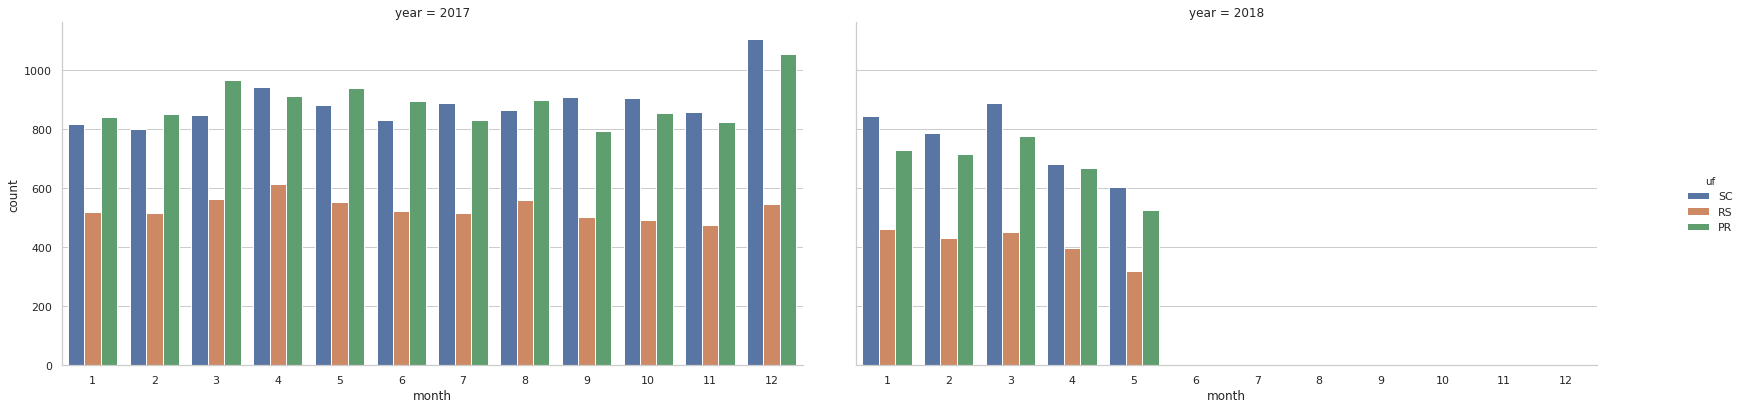

In [264]:
#a4_dims = (11.7, 8.27)
#fig, ax = pyplot.subplots(nrows=6, ncols=5)
a = sns.catplot(x="month", hue="uf", kind="count",col="year", data=sul)
a.fig.set_size_inches(25,6)

In [265]:
sul_2017.groupby('uf')['id'].agg({"count": len}).sort_values("count", ascending=False).head(8).reset_index()

/home/altieris/tools/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,uf,count
0,PR,10662.0
1,SC,10652.0
2,RS,6384.0


In [267]:
sul_2017.groupby(['uf', 'month'])['id'].agg({"count": len}).sort_values("count", ascending=False).head(8).reset_index()

/home/altieris/tools/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,uf,month,count
0,SC,12,1107.0
1,PR,12,1053.0
2,PR,3,968.0
3,SC,4,942.0
4,PR,5,938.0
5,PR,4,911.0
6,SC,9,910.0
7,SC,10,906.0


Paraná é o estado que mais apresentou acidentes rodoviários na região Sul com **10662** acidentes registrados, **10 acidentes** a mais que Santa Catarina.  
Rio Grande do Sul é o estado que menos apresentou acidentes em 2017 com **6384** acidentes registrados.  
O mês de **dezembro** apresenta as maiores taxas de acidentes rodoviários em 2017 sendo **1107** em Santa Catarina e **1053** no Paraná.  

### Top 10 tipos de acidentes no Paraná

/home/altieris/tools/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


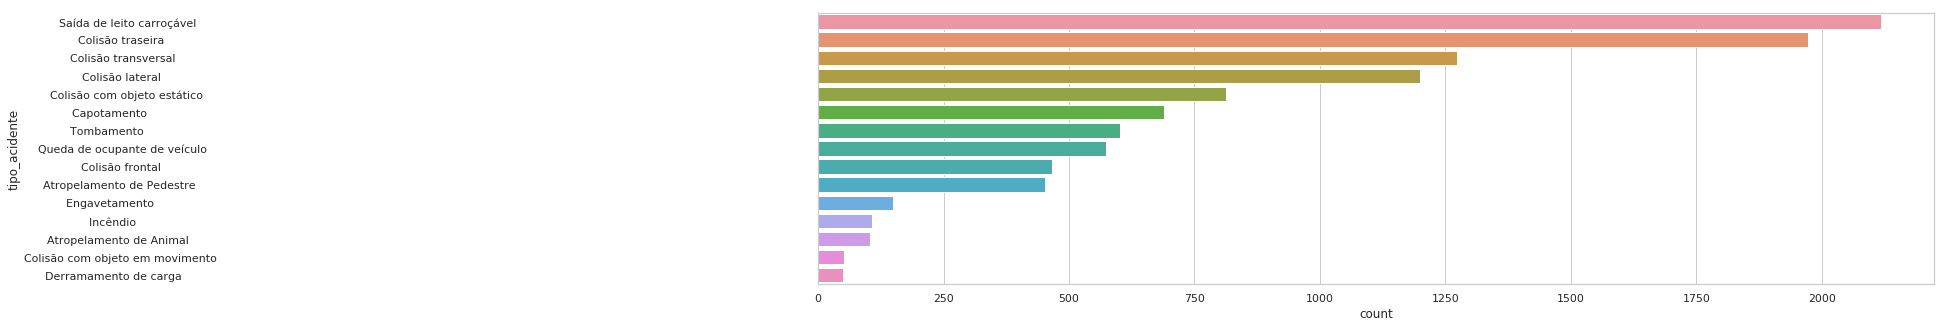

In [268]:
fig, ax = plt.subplots(figsize=(20,5))
pr = sul_2017[(sul_2017['uf'] == 'PR')].groupby(['tipo_acidente'])['id'].agg({"count": len}).sort_values("count", ascending=False).head(15).reset_index()
sns.barplot(x='count',y='tipo_acidente',data = pr)


### Principais causas de acidente no Paraná

/home/altieris/tools/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


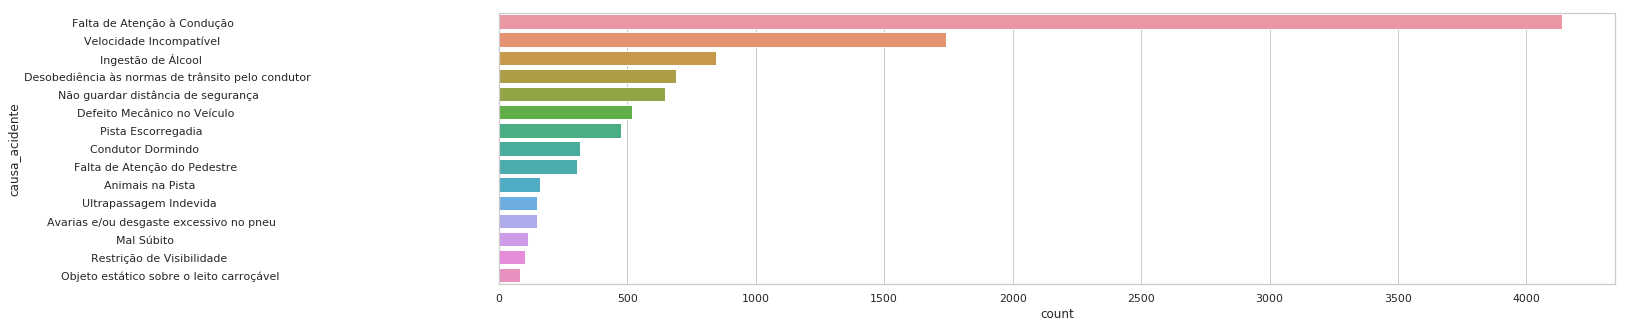

In [269]:
fig, ax = plt.subplots(figsize=(20,5))
pr = sul_2017[(sul_2017['uf'] == 'PR')].groupby(['causa_acidente'])['id'].agg({"count": len}).sort_values("count", ascending=False).head(15).reset_index()

sns.barplot(x='count',y='causa_acidente',data = pr)

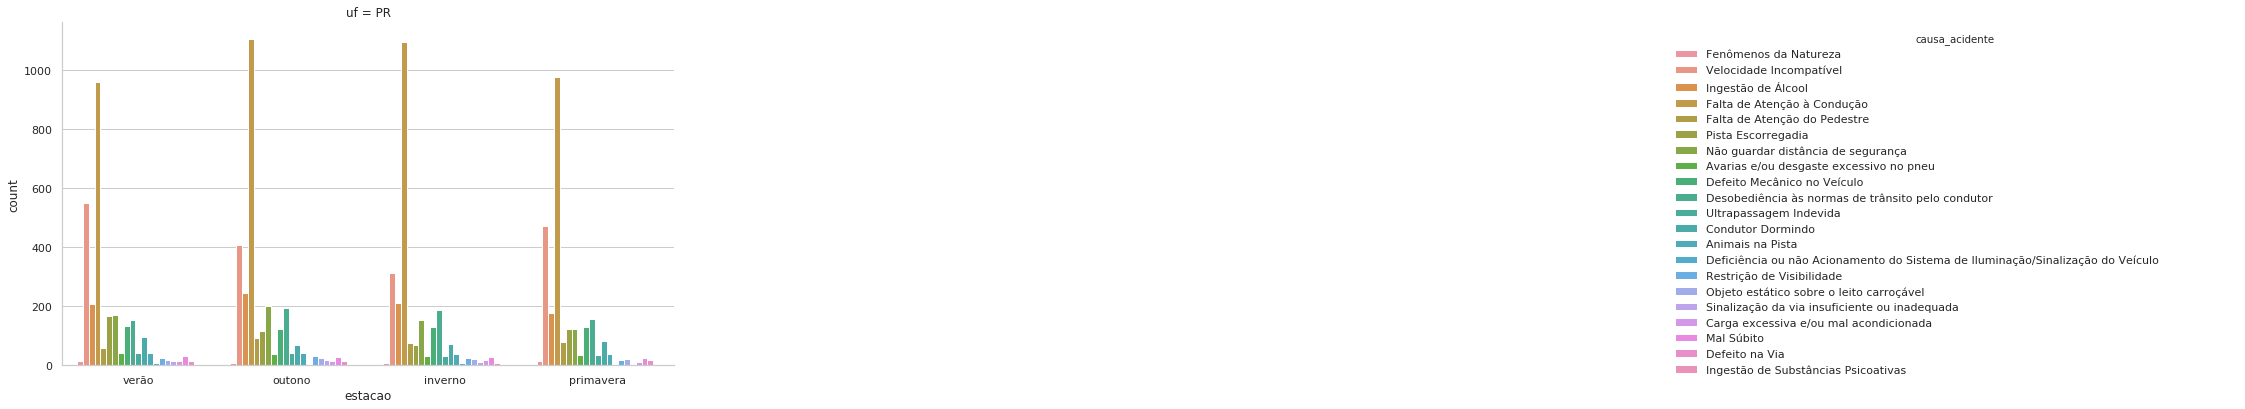

In [270]:
#fig, ax = plt.subplots(figsize=(20,5))
#pr = sul_2017[(sul_2017['uf'] == 'PR')].groupby(['estacao','causa_acidente'])['id'].agg({"count": len}).sort_values("count", ascending=False).head(15).reset_index()

a = sns.catplot(x="estacao", hue="causa_acidente", kind="count",col="uf", data=sul_2017[(sul_2017['uf'] == 'PR')])
a.fig.set_size_inches(35,6)

### Top 10 tipos de acidentes em Santa Catarina

/home/altieris/tools/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


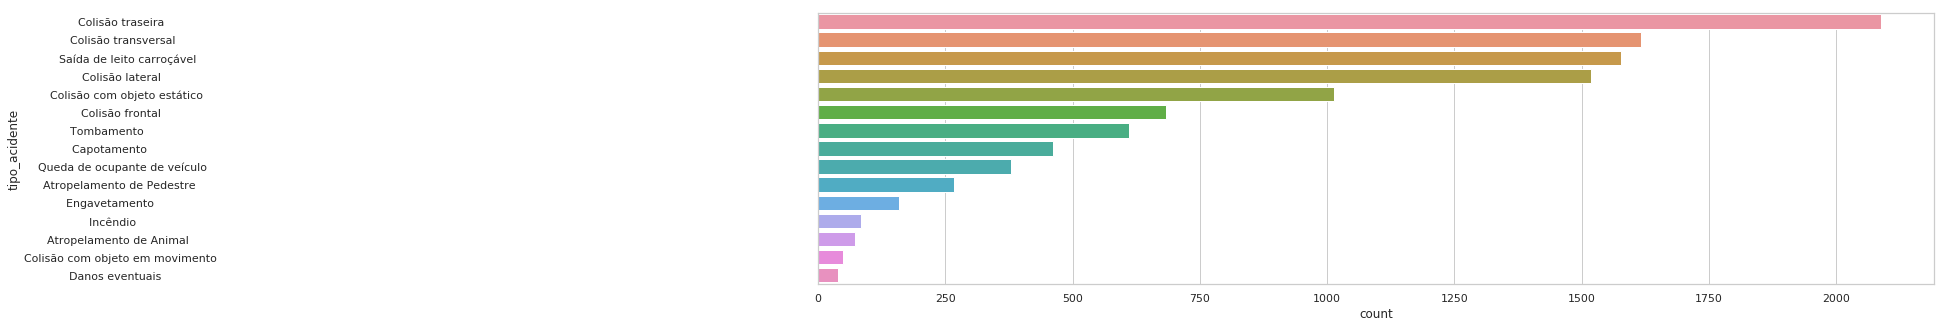

In [271]:
fig, ax = plt.subplots(figsize=(20,5))
sc = sul_2017[(sul_2017['uf'] == 'SC')].groupby(['tipo_acidente'])['id'].agg({"count": len}).sort_values("count", ascending=False).head(15).reset_index()
sns.barplot(x='count',y='tipo_acidente',data = sc)

### Principais causas de acidentes no Paraná

/home/altieris/tools/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


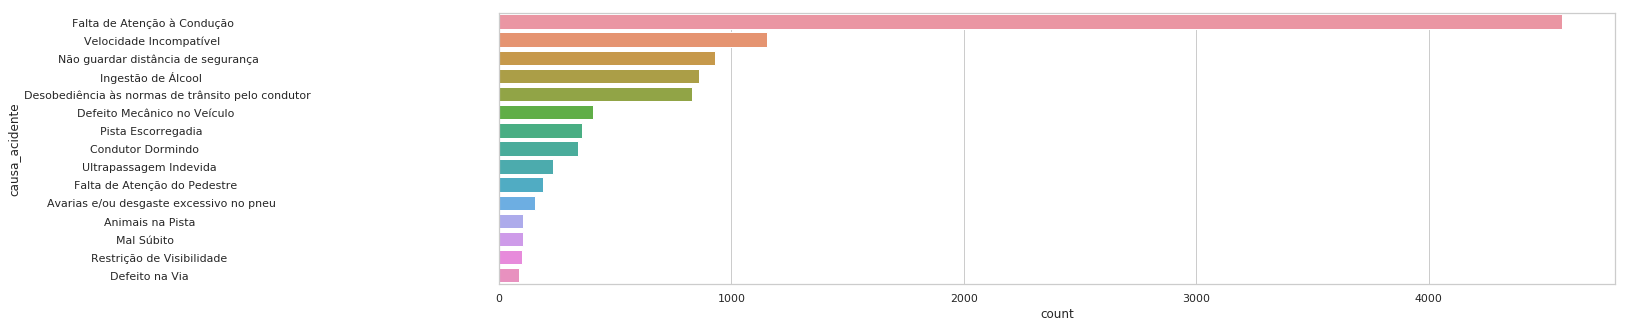

In [272]:
fig, ax = plt.subplots(figsize=(20,5))

sc = sul_2017[(sul_2017['uf'] == 'SC') & (sul_2017['tipo_acidente'])].groupby(['causa_acidente'])['id'].agg({"count": len}).sort_values("count", ascending=False).head(15).reset_index()
sns.barplot(x='count',y='causa_acidente',data = sc)

### Top 10 tipos de acidentes no Rio Grande do Sul

/home/altieris/tools/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


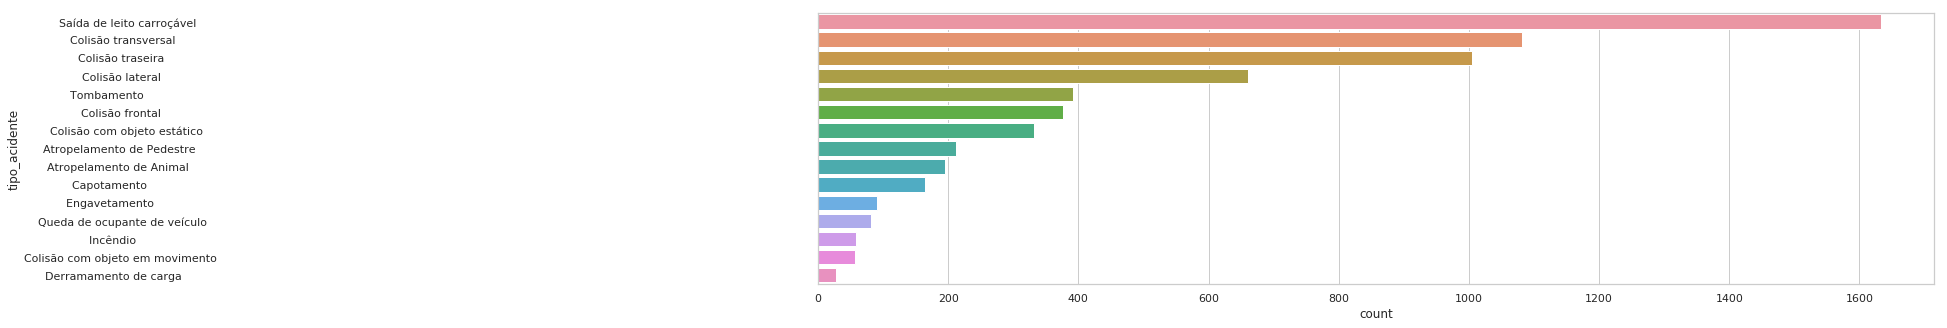

In [242]:
fig, ax = plt.subplots(figsize=(20,5))
rs = sul_2017[(sul_2017['uf'] == 'RS')].groupby(['tipo_acidente'])['id'].agg({"count": len}).sort_values("count", ascending=False).head(15).reset_index()
sns.barplot(x='count',y='tipo_acidente',data = rs)

/home/altieris/tools/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


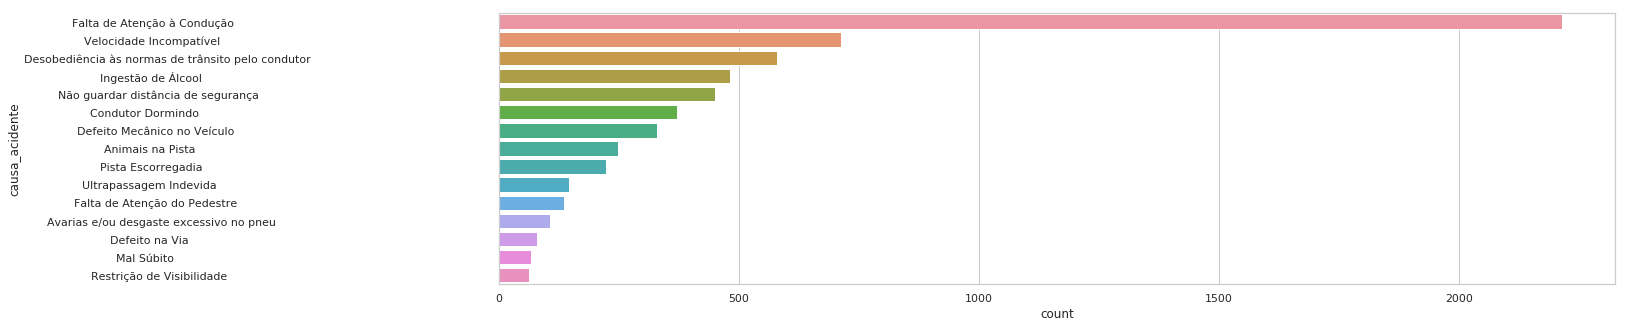

In [243]:
fig, ax = plt.subplots(figsize=(20,5))
rs = sul_2017[(sul_2017['uf'] == 'RS')].groupby(['causa_acidente'])['id'].agg({"count": len}).sort_values("count", ascending=False).head(15).reset_index()
sns.barplot(x='count',y='causa_acidente',data = rs)

### Vítimas 2017 x 2018

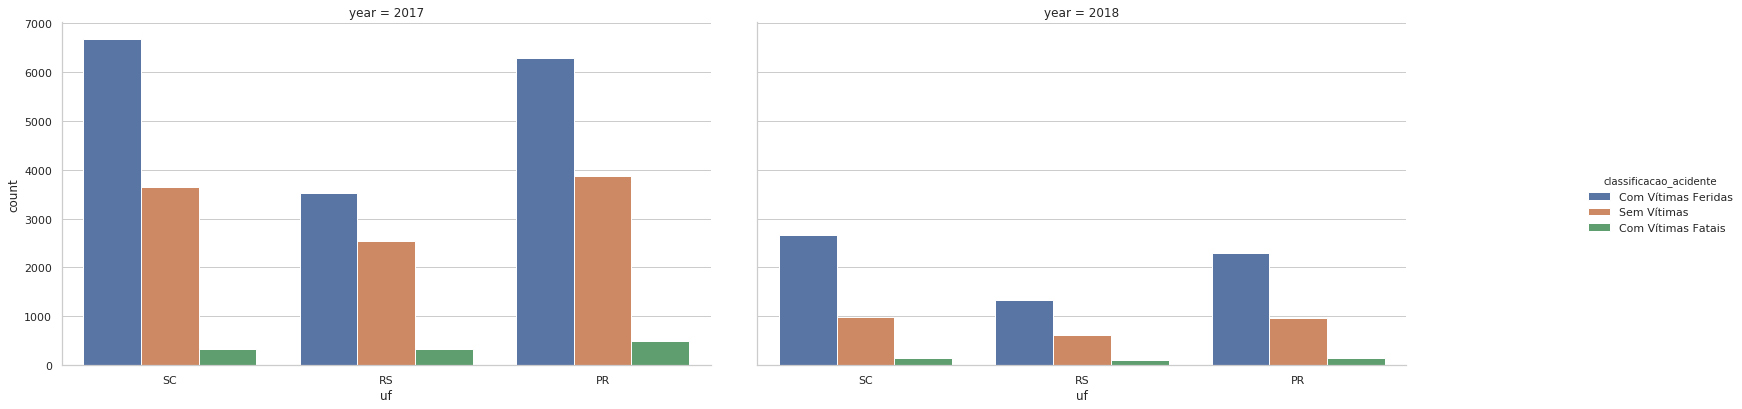

In [148]:
a = sns.catplot(x="uf", hue="classificacao_acidente", kind="count",col="year", data=sul)
a.fig.set_size_inches(25,6)

### Tipos de acidentes 

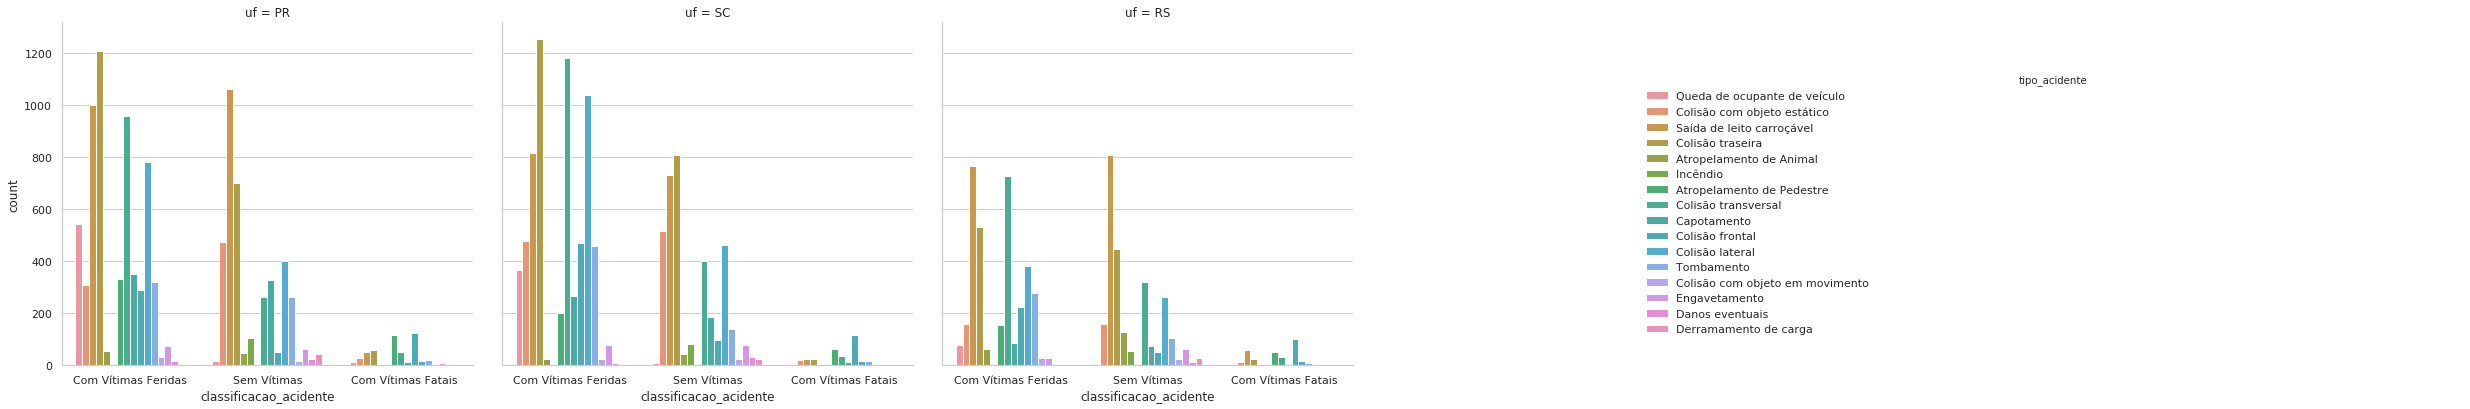

In [149]:
a = sns.catplot(x="classificacao_acidente", hue="tipo_acidente", kind="count",col="uf", data=sul_2017)
a.fig.set_size_inches(35,6)

### Acidentes por tipo de pista

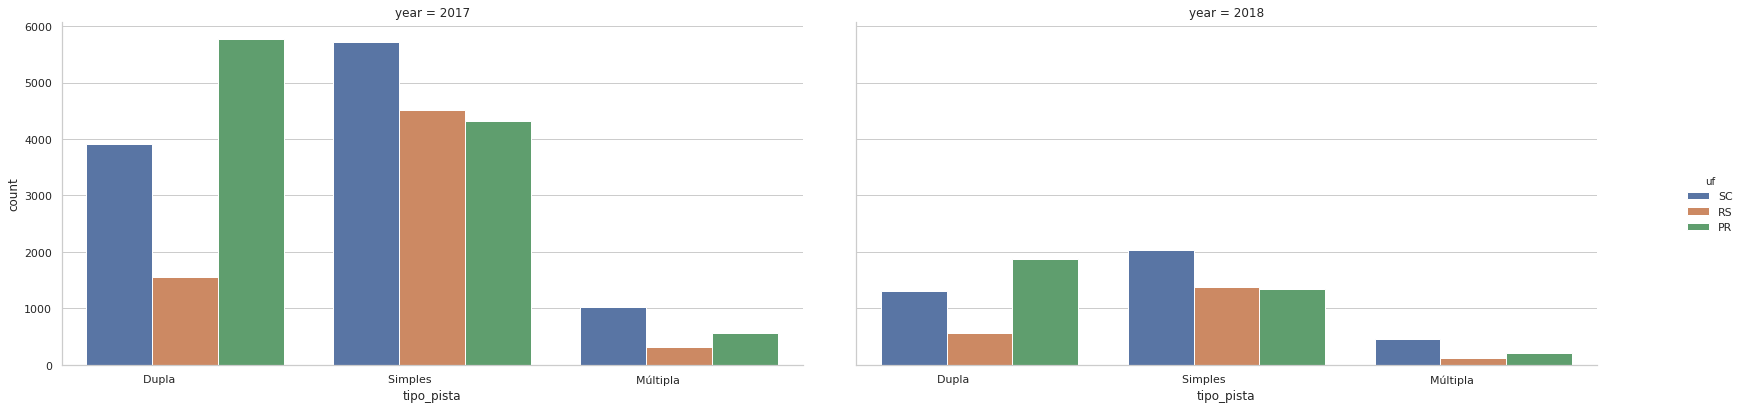

In [150]:
a = sns.catplot(x="tipo_pista", hue="uf", kind="count",col="year", data=sul)
a.fig.set_size_inches(25,6)

### Acidentes por tipos de pista

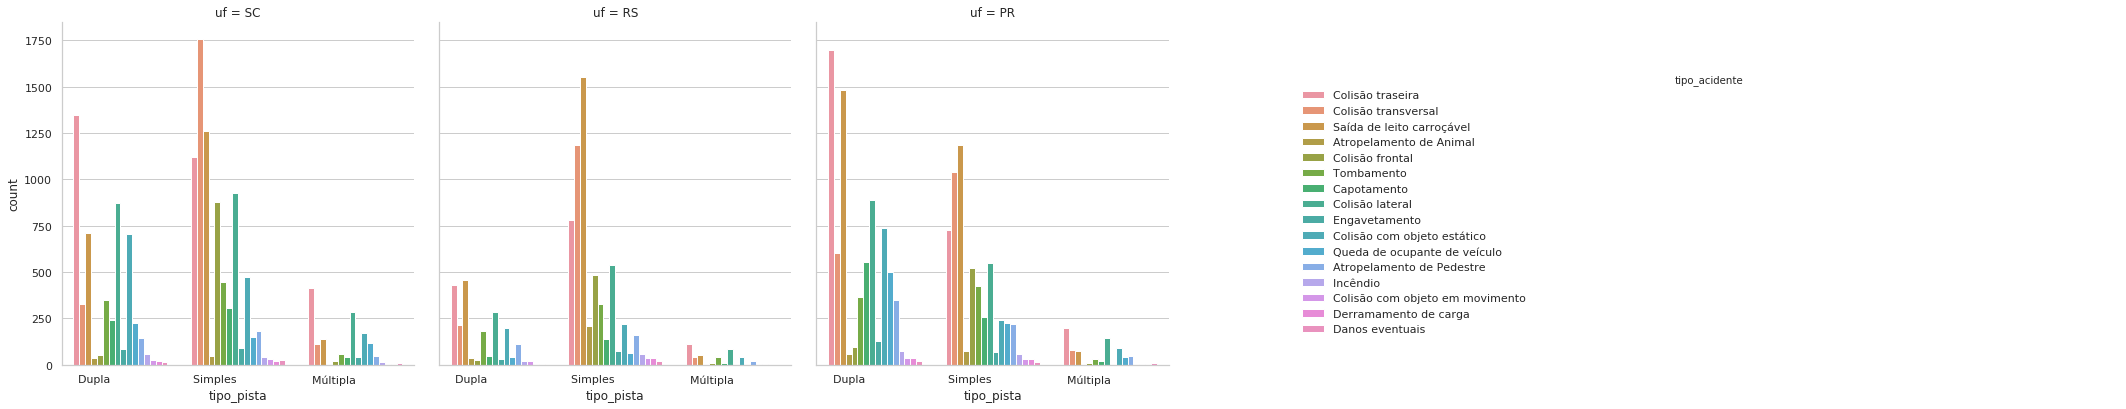

In [151]:
a = sns.catplot(x="tipo_pista", hue="tipo_acidente", kind="count",col="uf", data=sul)
a.fig.set_size_inches(30,6)

### Acidentes por condição meteorológica

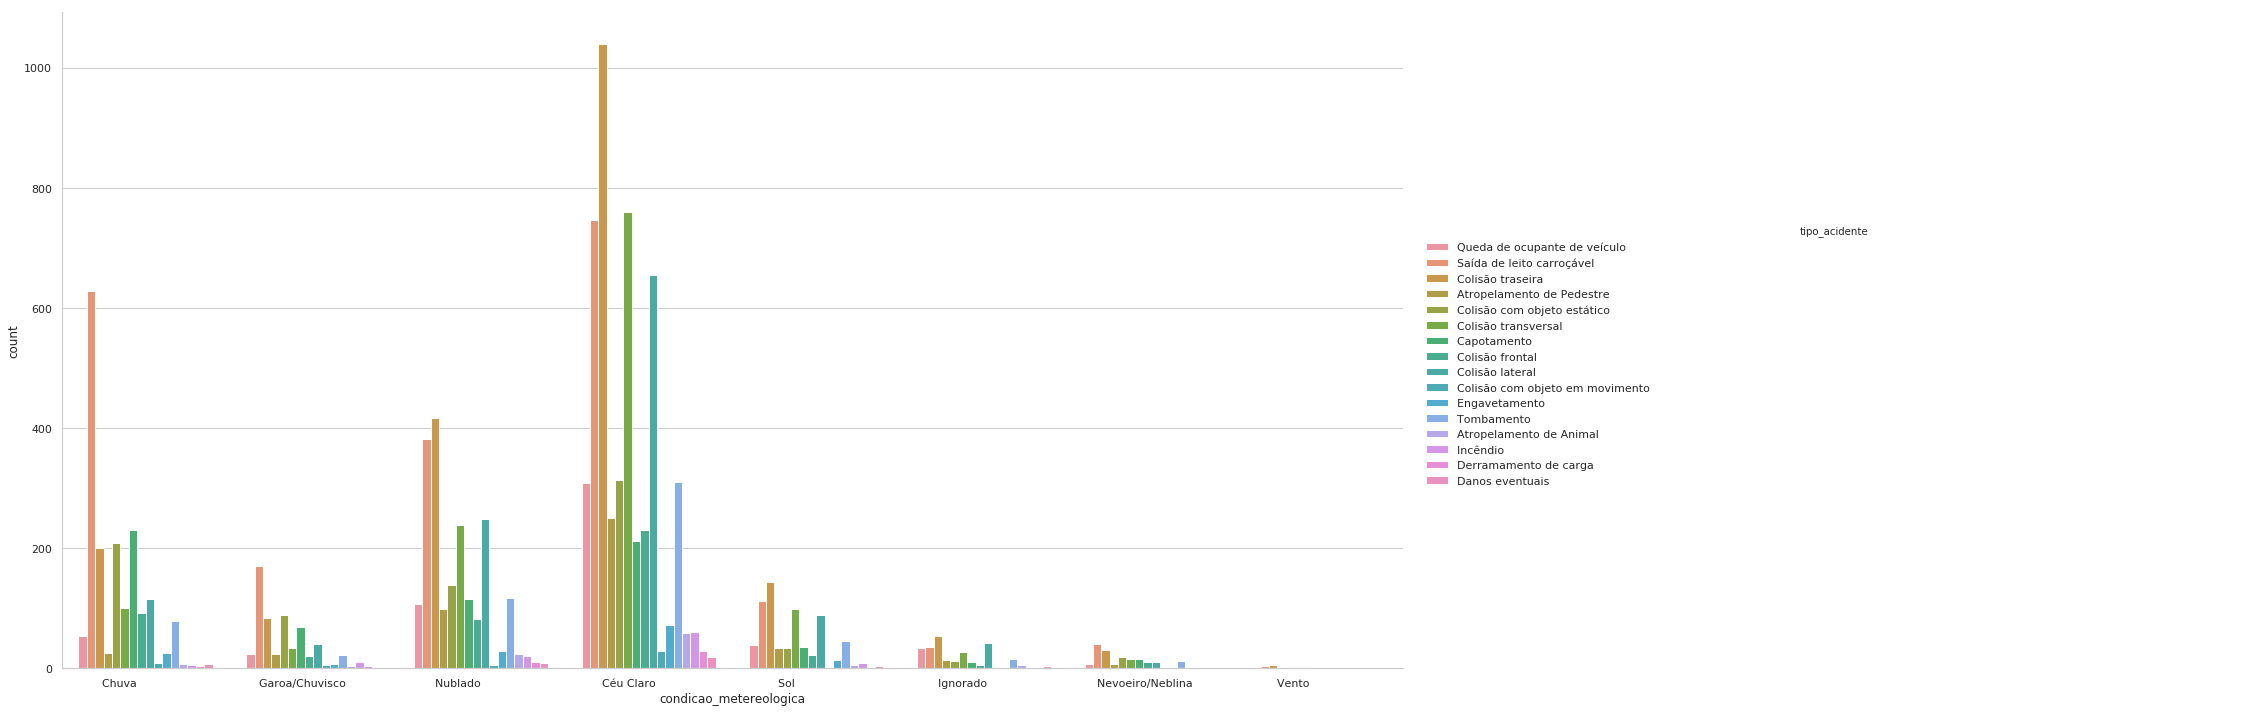

In [273]:
sul_df = sul[(sul['uf'] == 'PR') & (sul['year'] == 2017)]

a = sns.catplot(x="condicao_metereologica", hue="tipo_acidente", kind="count", data=sul_df,height=10,aspect=2)
#a.fig.set_size_inches(70,10)

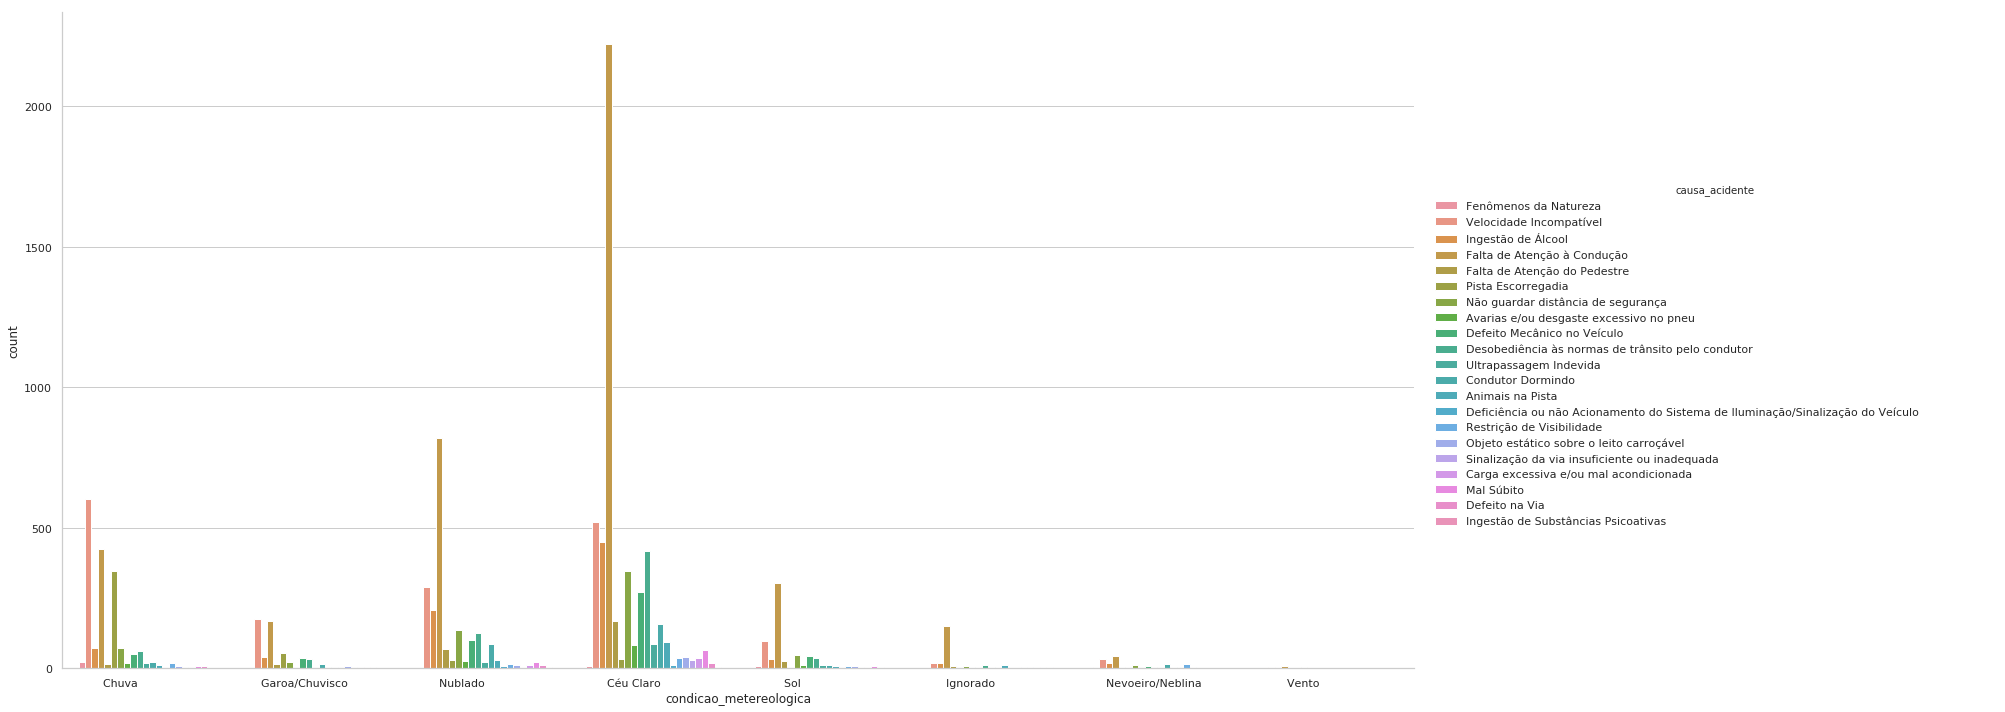

In [153]:
sul_df = sul[(sul['uf'] == 'PR') & (sul['year'] == 2017)]
a = sns.catplot(x="condicao_metereologica", hue="causa_acidente", kind="count", data=sul_df,height=10,aspect=2)

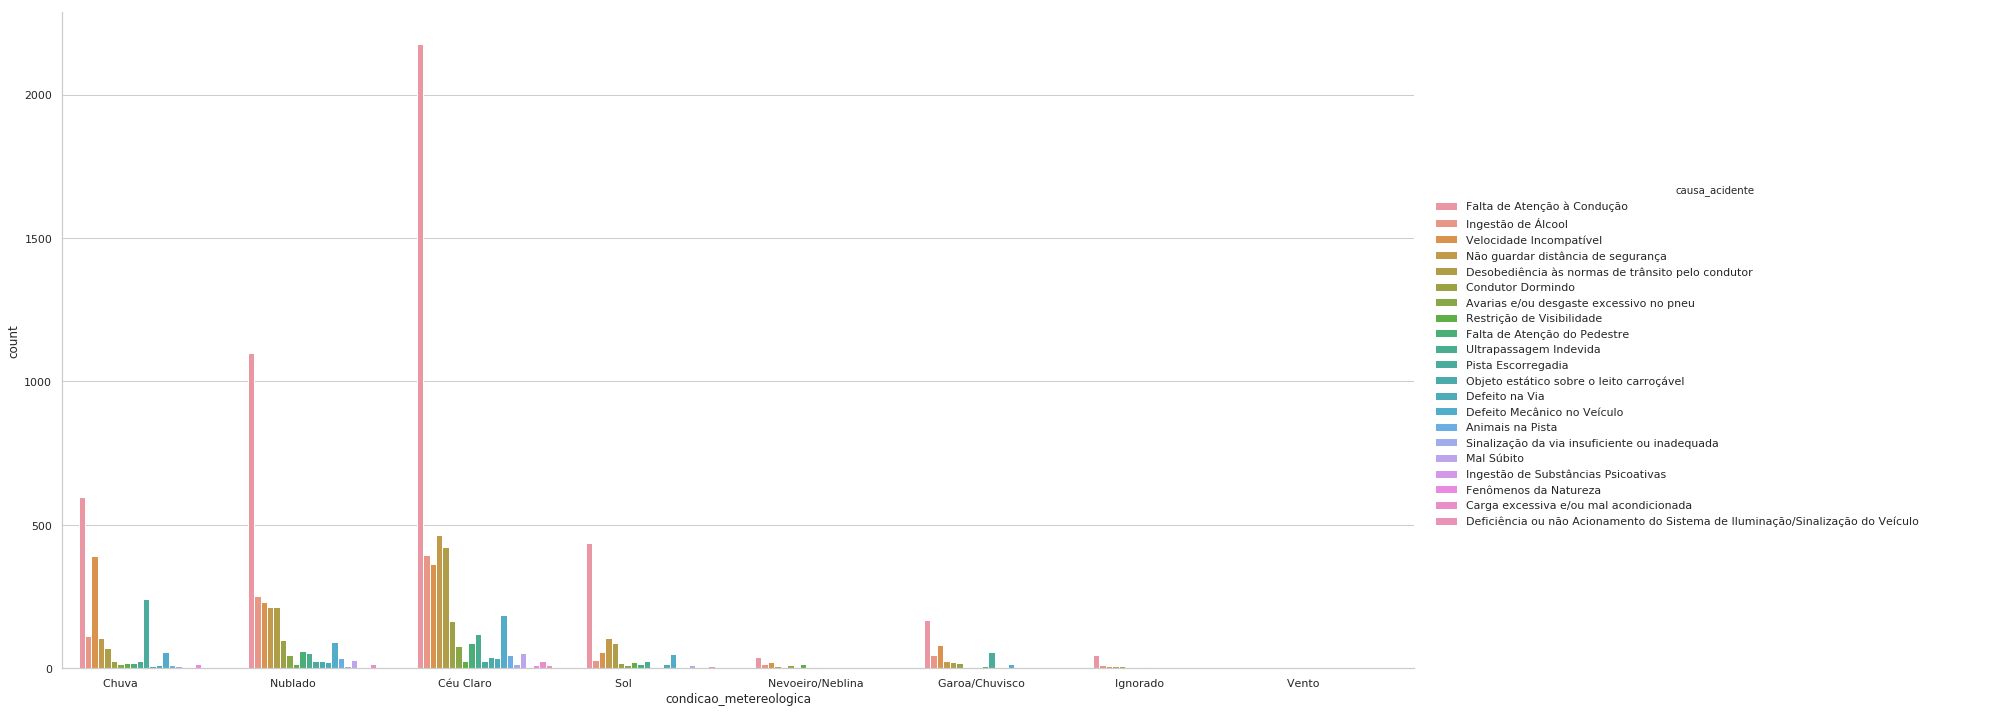

In [154]:
sul_df = sul[(sul['uf'] == 'SC') & (sul['year'] == 2017)]
a = sns.catplot(x="condicao_metereologica", hue="causa_acidente", kind="count", data=sul_df,height=10,aspect=2)

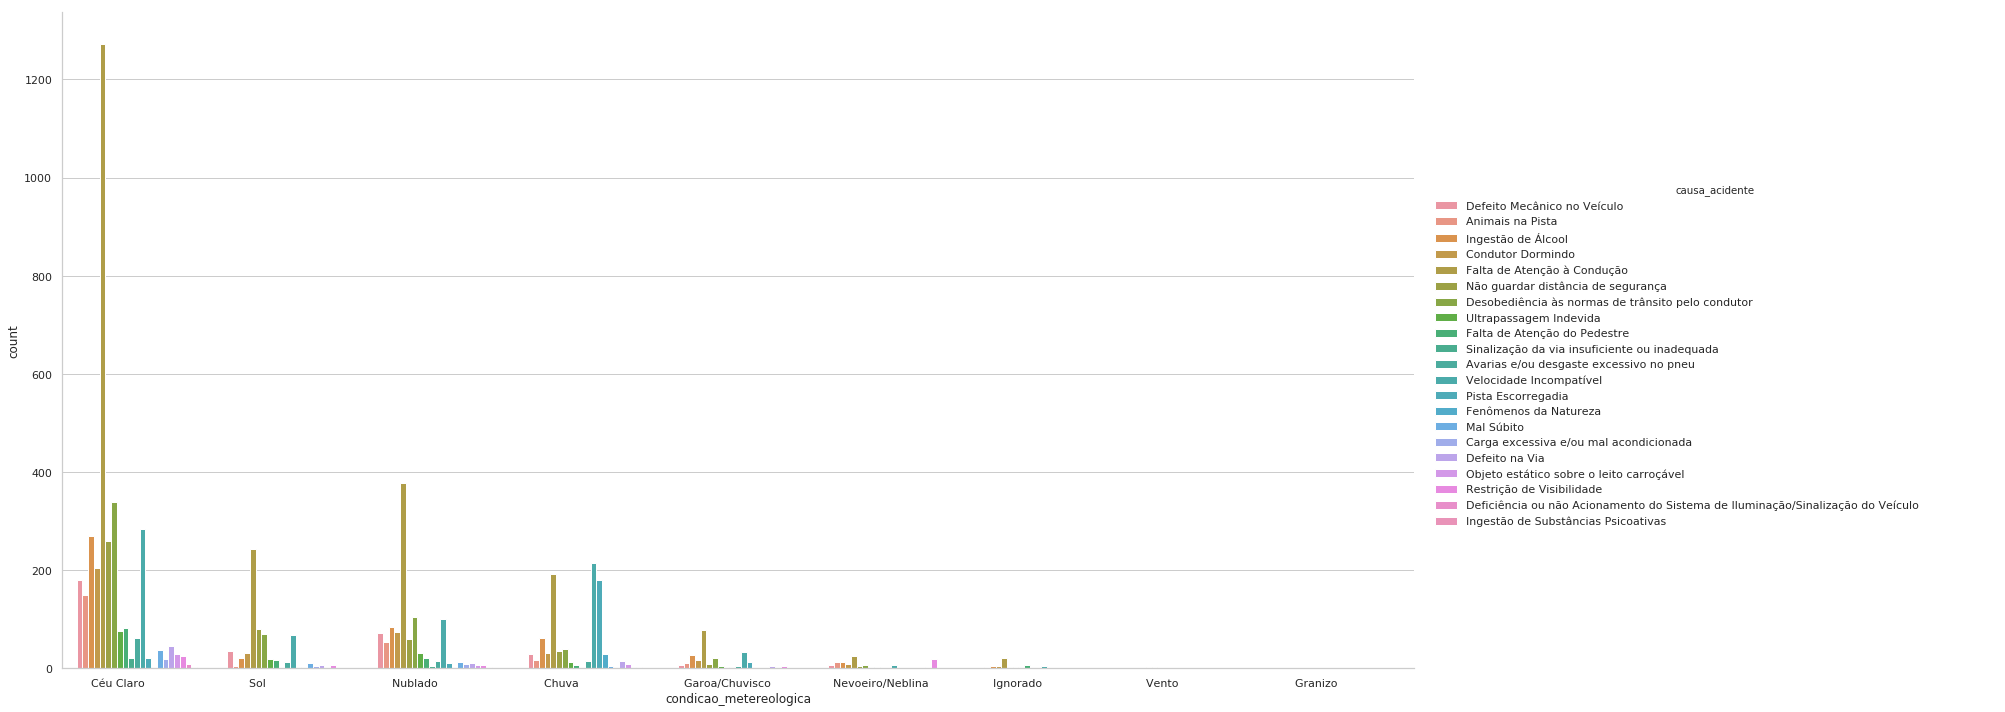

In [155]:
sul_df = sul[(sul['uf'] == 'RS') & (sul['year'] == 2017)]
a = sns.catplot(x="condicao_metereologica", hue="causa_acidente", kind="count", data=sul_df,height=10,aspect=2)

https://python-graph-gallery.com/